In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [5]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [6]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df=df.drop(122).reset_index(drop=True)

In [9]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


In [10]:

df=df.dropna().reset_index(drop=True)
df[['month', 'day', 'year']] = df[['month', 'day', 'year']].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=['month', 'day', 'year'], inplace=True)


df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [11]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [12]:
objects
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [13]:
df=df.drop(165).reset_index(drop=True)

In [14]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)   

In [15]:
dff=df.drop(['day','month','year'],axis=1)


In [16]:
dff.loc[:122,"Region"]=0
dff.loc[122:,"Region"]=1
dff[['Region']]=dff[['Region']].astype(int)

In [17]:
dff['Classes']=np.where(dff['Classes'].str.contains('not fire'),0,1)

In [18]:
X=dff.drop('FWI',axis=1)
y=dff['FWI']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.645380,-0.280833,-0.318872,0.693938,0.489839,0.380165,0.626802,0.464135,0.508626,0.245711
RH,-0.645380,1.000000,0.257184,0.230779,-0.632781,-0.410525,-0.241673,-0.701228,-0.360481,-0.433839,-0.370604
Ws,-0.280833,0.257184,1.000000,0.230003,-0.161391,0.004794,0.107368,-0.006268,0.042157,-0.040229,-0.231225
Rain,-0.318872,0.230779,0.230003,1.000000,-0.546540,-0.289536,-0.306431,-0.353492,-0.301455,-0.374078,-0.050991
FFMC,0.693938,-0.632781,-0.161391,-0.546540,1.000000,0.620265,0.533760,0.758535,0.608704,0.784427,0.233159
DMC,0.489839,-0.410525,0.004794,-0.289536,0.620265,1.000000,0.875607,0.690932,0.983599,0.606645,0.199939
DC,0.380165,-0.241673,0.107368,-0.306431,0.533760,0.875607,1.000000,0.545138,0.946348,0.539772,-0.081269
ISI,0.626802,-0.701228,-0.006268,-0.353492,0.758535,0.690932,0.545138,1.000000,0.655919,0.755893,0.281424
BUI,0.464135,-0.360481,0.042157,-0.301455,0.608704,0.983599,0.946348,0.655919,1.000000,0.602444,0.098997
Classes,0.508626,-0.433839,-0.040229,-0.374078,0.784427,0.606645,0.539772,0.755893,0.602444,1.000000,0.173264


<Axes: >

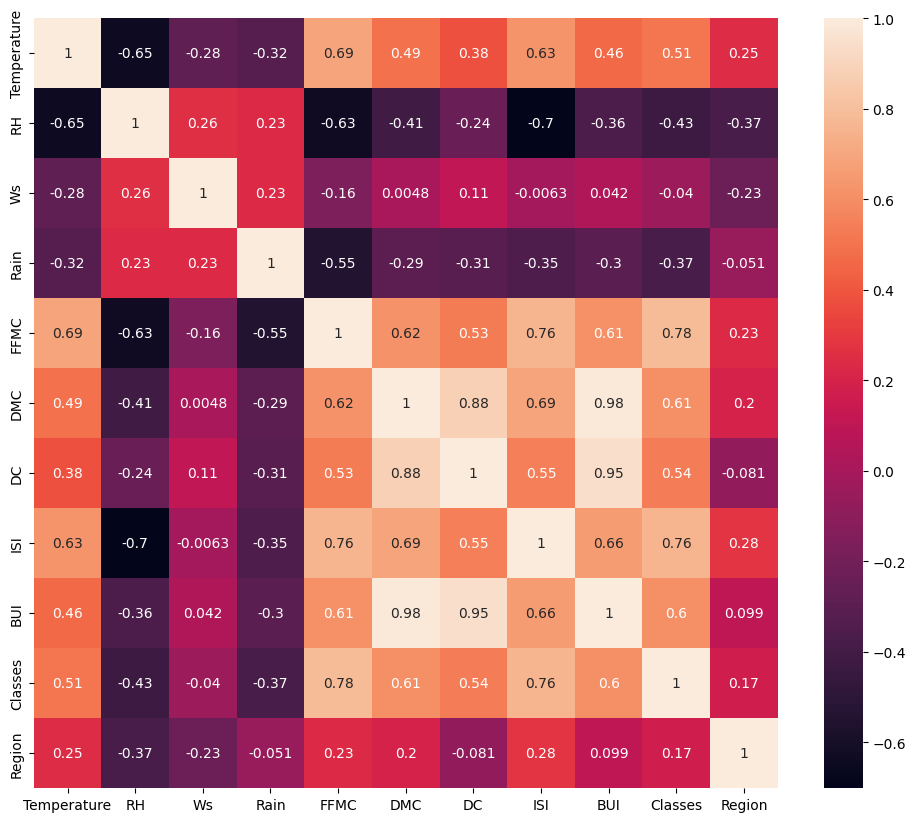

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)


In [22]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [24]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled

array([[-0.83322569,  0.76257647,  1.27806135, ..., -0.62192917,
        -1.08661074, -0.98356052],
       [-0.29170379,  0.62719016, -0.53202554, ..., -0.9306632 ,
        -1.08661074,  1.01671425],
       [-0.83322569, -1.47129761, -2.7041298 , ..., -0.47943653,
         0.92029277,  1.01671425],
       ...,
       [-1.91626949,  0.89796278,  0.55402659, ..., -1.07315583,
        -1.08661074, -0.98356052],
       [ 1.06210097, -0.4559003 ,  0.19200922, ...,  0.82674592,
         0.92029277,  1.01671425],
       [-0.56246474,  0.96565593,  2.0020961 , ..., -0.85941689,
        -1.08661074, -0.98356052]])

Text(0.5, 1.0, 'X_train After Scaling')

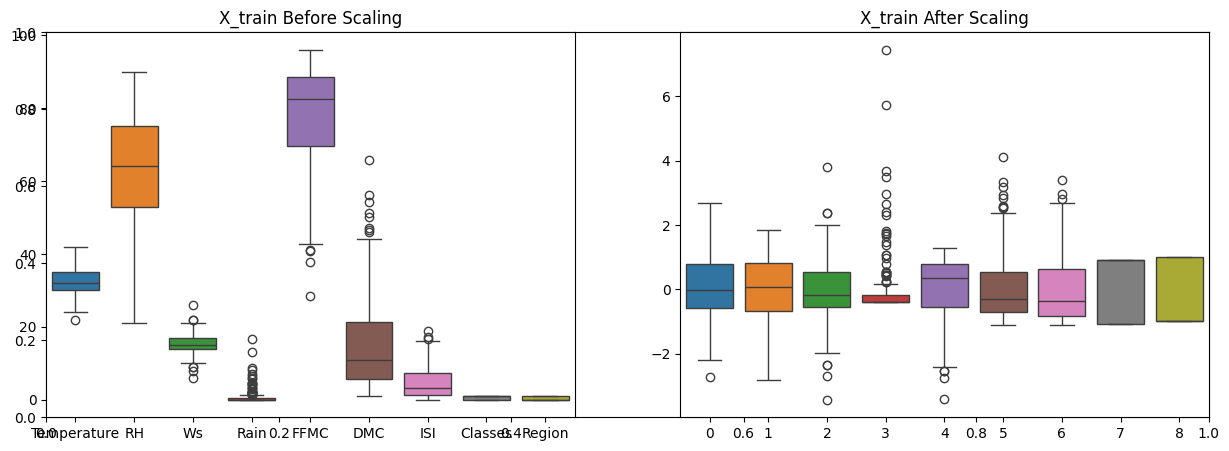

In [26]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Mean absolute error 0.593039784830629
R2 Score 0.9838272318461305


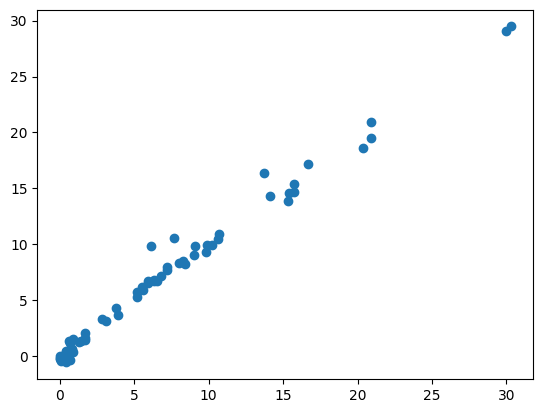

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.1449985876746023
R2 Score 0.95133305686452


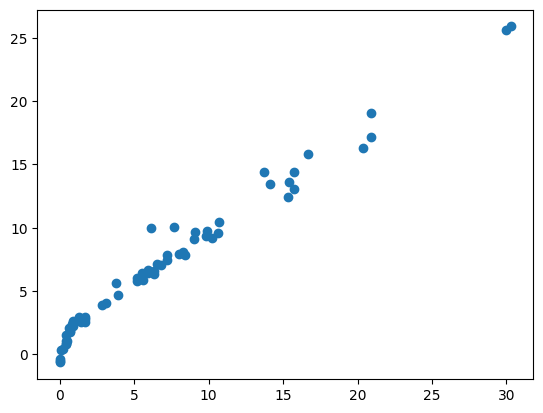

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [29]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.6807204139769436
R2 Score 0.9811539995578824


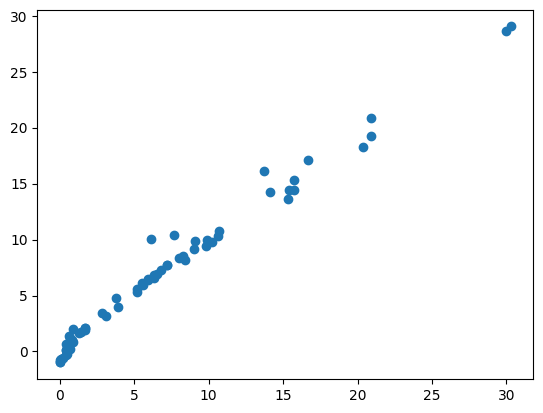

In [30]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6164750683641345
R2 Score 0.9830881894125235


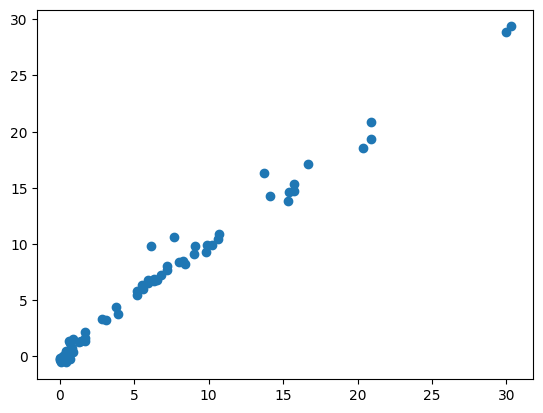

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.8470636045405622
R2 Score 0.973966371702034


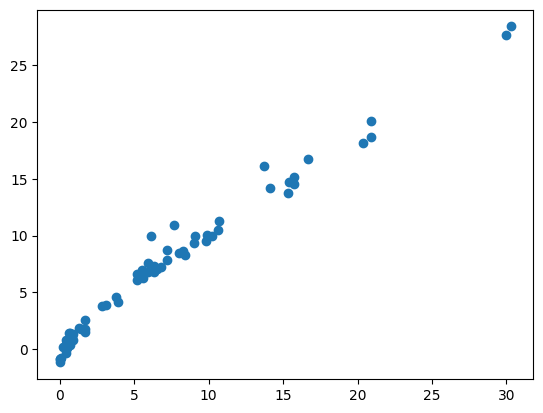

In [32]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.9139015163273503
R2 Score 0.8746420307680666


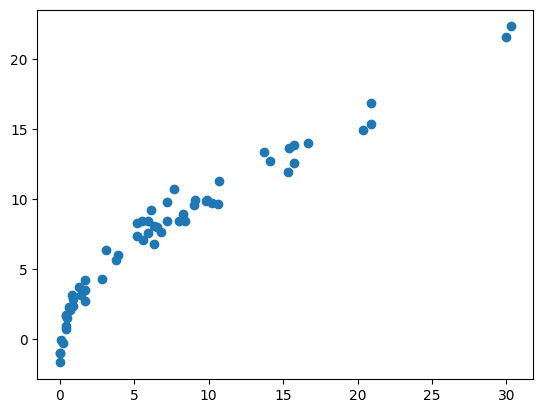

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7286555335973286
R2 Score 0.9797710074361022


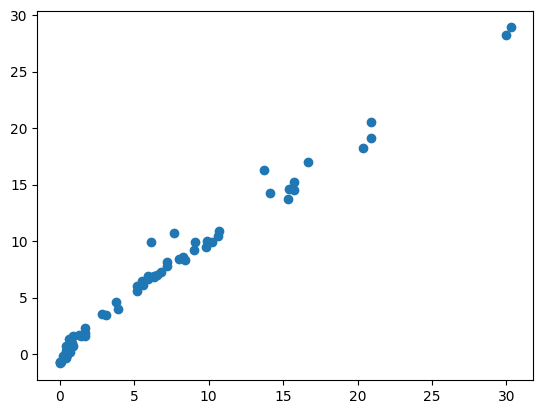

In [34]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [35]:
ridge


Ridge()

In [36]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
